## Simulation und Modellierung WS16/17
### Uebung 09

### Aufgabe 01 : Oberflaechen Plots

Wenn sich die Punkte $\vec{r}=\vec{r}(p,q)$ einer Flaeche als Funktion von zwei verallgemeinerten Koordinaten $p\in[p_{min},p_{max}]$ sowie $q\in[q_{min},q_{max}]$ parametrisieren lassen, dann kann man diese Flaeche in einem 3-dimensionalen `mplot3d` Plot darstellen.
```python
%matplotlib notebook
from pylab import *
from mpl_toolkit.mplot3d import Axes3D

Lp = 200
Lq = 200
p = np.linspace(pmin,pmax,Lp)
q = np.linspace(qmin,qmax,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = calculate_x(P,Q) # x[i,j] = x(p[i],q[j])
y = calculate_y(P,Q)
z = calculate_z(P,Q)

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(x,y,z,rstride=2,cstride=2,facecolors=F,alpha=0.4) # oder plot_wireframe(...)


ax3d.set_xlim(...) # man sollte moeglichst gleiche Koordinatenbereiche waehlen,
ax3d.set_ylim(...) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(...)
axis('square')     # macht alle Axen gleich lang in der Darstellung

# Plotaufbereitung

show()
```

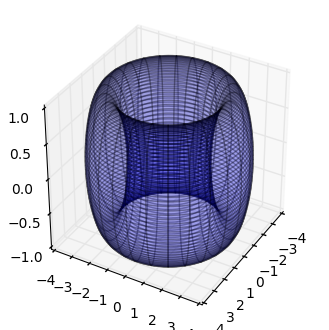

In [1]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Torus

L = 100
p = np.linspace(0, 2.*np.pi, L)
q = np.linspace(0, 2.*np.pi, L)
P,Q = np.meshgrid(p,q)
r = 3 # radius
a = 1 # innerer radius

# Parameter
x = (r + a*np.cos(P)) * np.cos(Q)
y = (r + a*np.cos(P)) * np.sin(Q)
z = a * np.sin(P)

# plotten
fig=figure('3DPlots')
ax = fig.add_subplot(111,projection='3d',aspect=1)

ax.view_init(35, 30) # winkel aus dem der plot betrachtet wird
ax.plot_surface(x,y,z,rstride=4,cstride=1,alpha=0.2)
show()

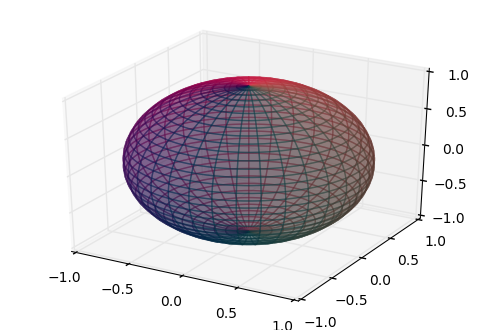

In [11]:
# Kugel

L = 100
p = np.linspace(0, np.pi, L)
q = np.linspace(0, 2.*np.pi, L)
P,Q = np.meshgrid(p,q)
r = 1

x = r * np.sin(P) * np.cos(Q)
y = r * np.sin(P) * np.sin(Q)
z = r * np.cos(P)

# cmap farbe
F=np.zeros((L,L,3))
F[:,:,0]=(1+sin(Q))/2
F[:,:,1]=(1+cos(Q))/5
F[:,:,2]=1/3

# plotten
fig=figure('3DPlots')
ax= fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z,rstride=3,cstride=3,facecolors=F,alpha=0.4) #x.plot_surface.
show()

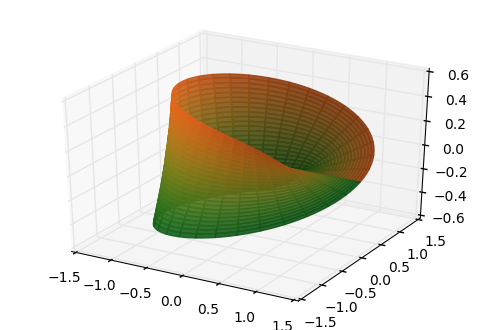

In [13]:
# moebius

L = 100
p = np.linspace(0, 2.*np.pi, L)
q = np.linspace(-1, 1, L)
P,Q = np.meshgrid(p,q)


# Parameter
x = cos(P)*(1+(Q/2)*cos(P/2))
y = sin(P)*(1+(Q/2)*cos(P/2))
z = (Q/2)*sin(P/2)

# Farbe
F=np.zeros((L,L,3))
F[:,:,0]=(1+sin(Q))/2
F[:,:,1]=(1+cos(Q))/4
F[:,:,2]=1/9

# plotten
fig=figure('3DPlots')
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z,rstride=4,cstride=3,facecolors=F,alpha=0.9)
show()

Finden Sie geeignete Parametrisierungen der folgenden Flaechen, und plotten diese in 3d als Wireframe- oder Surface Plots mit geeigneter Farbskala `cmap` oder individuellen `facecolors` :

- Kugeloberflaeche
- Torus 
- <a href="https://en.wikipedia.org/wiki/M%C3%B6bius_strip">Moebiusband</a>


**Zusatzaufgabe :** Schreiben Sie eine Funktion `Tknot(p,q,R=2,r=1,h=0.1,Lp=200,Lq=200)`, welche einen Schlauch um einen<a href="">`(p,q)` Torusknoten</a> auf einem Torus mit Radius `R`, Torusschlauchradius `r` und Torusknotenschlauchradius `h` zeichnet. (Der 1d Torusknoten hat nur eine verallgemeinerte Koordinate. Die andere parametrisiert einen senkrechten Ring in Abstand `h` um den Torusknoten)

### Aufgabe 02 : Newton Fraktale

- Schreiben Sie eine Funktion `Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e3,Nmax=100)` welche das Newton Verfahren mit der Funktion `f(x)` und deren Ableitung `fprime(x)` beginnend bei $x_0$ solange ausfuehrt bis $\left|f(x_n)\right|\le d_{min}$, $\left|f(x_n)\right|\ge d_{max}$ oder $n=N_{max}$ und den Wert $x_n$ der Nullstellen-Naeherung sowie die Zahl $n$ der notwendigen Iterationsschritte ausgibt.

- Bestimmen Sie fuer alle *komplexen* Anfangswerte $z =x+iy $ auf einem geeigneten Gitter die Approximation der von dort gefundenen Nullstellen der Funktion $f(z)=z^3-1$ und die Zahl der benoetigten Iterationsschritte. Berechnen Sie aus diesen Werten geeignete `[r,g,b]` Farben oder eine skalare Funktion und plotten Sie diese mit `imshow` ueber dem Gitter.

Hinweis : Wenn Sie die Funktionen `Newton_Steps`, `f` und `fprime` sorgfaeltig programmieren, koennen diese direkt auf ein ganzes `numpy` Feld von Anfangswerten gleichzeitig angewendet werden ohne Python Schleifen zu verwenden.

In [ ]:
from pylab import *
from matplotlib import pyplot as plt
import random

x = np.linspace(0,10,11*10)
y = np.linspace(0,10,11*10)


#### erzeugen einer Matrix (np.array) um alle Permutationen an x,y abgebildet auf
   # eine jeweilige komplexe Zahl Z x + yi zu verwalten.
   
Z = np.zeros((len(x),len(y)),dtype=complex)

for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = complex(x[i],y[j])

# f(z)

def f(z):

    X = z**3 - 1
    return(X)

# 1. ableitung von f(z)
def fprime(z):

    delta_z = complex(0.001,0.001)

    Y = (f(z + delta_z) - f(z - delta_z)) / (2 * delta_z)
    return(Y)

f_ = f(Z[:,2])
dz = Z[1,1] - Z[0,0]

f_prime = fprime(Z[:,2])

# Funktion Newton_Steps

def Newton_Steps(z0,f_,f_prime,dmin=1e-15,dmax=1e+3,Nmax=100):


    zn = [z0]
    n  = 0
    i  = 0

    while abs(f(zn[i])) > dmin or n <= 100:

        zn.append(zn[i] - (f(zn[i]) / fprime(zn[i])))
        n += 1
        i += 1

    return(n)

print(Newton_Steps(Z[0,0],f_,f_prime))

#### Zusatzaufgabe :

- Definieren Sie eine Funktion `polymaker(c)` welche bei einem gegebenen iterierbaren Container `c` mit Nullstellen $c_i$ die Funktion `f(x)`$=\prod_i (x-c_i)$ und deren Ableitung `fprime(x)`$=\sum_i \prod_{j\ne i} (x-c_j)$ dynamisch generiert und als Funktionsobjekte zurueckliefert.

- Plotten Sie Beispiele fuer Newton Fraktale von verschiedenen Funktionen, die Sie mit `polymaker(c)` erzeugen.